In [1]:
import pandas as pd
import numpy as np
import os
os.chdir('../../../../../')
print(os.getcwd())
from load_config import load_config
from v2.strategy.indicators.optimal_v2 import Optimal_v2
from v2.model import Trading
from v2.strategy.indicators.param import Param
from v2.strategy.indicators.roc import RateOfChange
from v2.research.scripts import notebook_utils as nu
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier


/Users/rosscopeland/Desktop/personal/code/vivaldi/back_testing


In [2]:
# features = ["RSI", "MACD", "stosc_k", "stosc_d", "RateOfChange_MACD_1", "RateOfChange_MACD_5", "RateOfChange_MACD_10", "RateOfChange_MACD_60", "RateOfChange_RSI_1", "RateOfChange_RSI_5", "RateOfChange_RSI_10", "RateOfChange_RSI_60", "RateOfChange_close_1", "RateOfChange_close_5", "RateOfChange_close_10", "RateOfChange_close_60"]


In [3]:
dataset, features, scalers = nu.loadData(indicators=[['cci', 'close'], ['psar', 'close'], ['optimal_v2', 'close']],
                            param_spec={},
                            optimal_threshold={"buy": 0.95},
                            spans=[{'indicator_name':'momentum',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'PSAR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]}
                                #     {'indicator_name':'momentum',
                                #     'column_name': 'PSAR',
                                #     'param_name': 'period',
                                #     'param_values': [1,5]}
                                    ],

                            scale='minmax')
        
    # create one minute, five minute, ten minute, and twenty minute slopes for macd, rsi




Loading data from BTCUSDT-1m...
cci close
cci close
ccicci close
cci close
 close
cci cci close
close
ccicci close
 close
ccicci  close
close
cci close
v2.strategy.indicators.cci
psar close
v2.strategy.indicators.psar
optimal_v2 close
v2.strategy.indicators.optimal_v2
momentum CCI
v2.strategy.indicators.momentum
momentum CCI
v2.strategy.indicators.momentum
momentum CCI
v2.strategy.indicators.momentum
roc close
v2.strategy.indicators.roc
roc close
v2.strategy.indicators.roc
roc close
v2.strategy.indicators.roc
momentum close
v2.strategy.indicators.momentum
momentum close
v2.strategy.indicators.momentum
momentum close
v2.strategy.indicators.momentum
momentum close
v2.strategy.indicators.momentum
momentum close
v2.strategy.indicators.momentum
momentum close
v2.strategy.indicators.momentum
roc PSAR
v2.strategy.indicators.roc
roc PSAR
v2.strategy.indicators.roc
roc PSAR
v2.strategy.indicators.roc


IndexError: list index out of range

In [4]:
final_dataset = dataset

In [5]:
dataset = []

In [6]:


train, test = train_test_split(final_dataset, test_size=0.05, shuffle=False)


<h3>Models</h3>
<p>Random Forest</p>
<p>Fine tuned RF</p>
<p>Gradient boost</p>
<p>GB inside RF</p>
<p>RF inside GB</p>
<p>LSTM</p>

In [7]:

buy_signals = train[train['optimal'] == 1.0]

In [8]:
mean_num_singals = int(len(buy_signals))

In [9]:
not_signals = train[train['optimal'] == 0.0]


In [10]:
print(mean_num_singals, len(not_signals))

13277 1618352


In [11]:
not_signals_sampled = not_signals.sample(n=mean_num_singals * 8, random_state=69420, axis=0)
not_signals_sampled = not_signals_sampled.sample(frac=1)

In [12]:

balanced_data_buy = pd.concat([not_signals_sampled, buy_signals])
not_signals_sampled = []
buy_signals = []
not_signals = []


In [13]:
# filtered_balanced_data_buy = balanced_data_buy[["close", "stosc_k", "stosc_d", "slope", 'rsi']]
filtered_balanced_data_buy = balanced_data_buy[features]




balanced_data_optimal_buy = balanced_data_buy[['optimal']]
balanced_data_buy = []



In [14]:
filtered_balanced_data_buy

,CCI,PSAR,Momentum_CCI_period_1,Momentum_CCI_period_5,Momentum_CCI_period_10,RateOfChange_close_period_1,RateOfChange_close_period_5,RateOfChange_close_period_10,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_close_period_1,Momentum_close_period_5,Momentum_close_period_10,Momentum_PSAR_period_1,Momentum_PSAR_period_5,Momentum_PSAR_period_10
325954,0.546527,0.464072,0.518387,0.570784,0.552686,0.491117,0.487212,0.434680,0.508776,0.483720,0.539591,0.508776,0.483720,0.539591,0.527192,0.531434,0.521832
526571,0.525615,0.479767,0.511832,0.558172,0.542837,0.475401,0.469197,0.428813,0.493994,0.469829,0.534523,0.493994,0.469829,0.534523,0.547135,0.552054,0.542767
59147,0.533184,0.474888,0.507870,0.558050,0.551035,0.477449,0.472301,0.440296,0.495506,0.471824,0.540951,0.495506,0.471824,0.540951,0.547400,0.550388,0.533322
1303011,0.491059,0.482611,0.517791,0.562446,0.555186,0.480098,0.471894,0.431841,0.499838,0.471945,0.537566,0.499838,0.471945,0.537566,0.544227,0.547746,0.532962
1076272,0.534067,0.502200,0.506216,0.555852,0.551531,0.473820,0.469432,0.428937,0.491113,0.469101,0.533776,0.491113,0.469101,0.533776,0.547445,0.550412,0.536456
505393,0.525915,0.489872,0.511645,0.559189,0.551329,0.476690,0.468203,0.430633,0.495116,0.468916,0.536002,0.495116,0.468916,0.536002,0.545994,0.549574,0.545266
602609,0.529200,0.487294,0.504705,0.552760,0.536475,0.474214,0.467613,0.425666,0.493007,0.468749,0.532043,0.493007,0.468749,0.532043,0.547121,0.550541,0.538051
768053,0.508806,0.480190,0.514235,0.570855,0.553251,0.477710,0.473353,0.431108,0.495555,0.472165,0.536201,0.495555,0.472165,0.536201,0.546671,0.549148,0.536743
1538843,0.541289,0.483036,0.509669,0.566700,0.544222,0.477832,0.475388,0.430214,0.496620,0.475647,0.535499,0.496620,0.475647,0.535499,0.546187,0.544365,0.533598
713395,0.562238,0.500363,0.507336,0.554242,0.537533,0.473937,0.471436,0.431850,0.493682,0.471433,0.536577,0.493682,0.471433,0.536577,0.547114,0.548743,0.535588


In [15]:

clf_buy = RandomForestClassifier(random_state=69420, n_jobs=-1, n_estimators=100, criterion='gini', min_samples_leaf=2)

clf_buy.fit(filtered_balanced_data_buy, balanced_data_optimal_buy)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=69420,
                       verbose=0, warm_start=False)

In [16]:
# from sklearn.inspection import permutation_importance
# feature_importances = permutation_importance(clf_buy, filtered_balanced_data_buy.values, balanced_data_optimal_buy.values, n_repeats=10, random_state=69420)

# for i in range(len(feature_importances.importances_mean)):
#     print('i: {}, Feature: {}, Score: {}'.format(i, filtered_balanced_data_buy.columns[i], feature_importances.importances_mean[i]))

In [17]:
def insert_buys(close, prediction):
    if prediction == 1:
        return close
    else:
        return None

def insert_sells(close, prediction):
    if prediction == -1:
        return close
    else:
        return None



In [18]:
import pickle

In [19]:
filtered_test = test[["close", 'optimal', 'volume']]
filtered_test_2 = test[features]

In [20]:
# filtered_sell = test[["close", "rsi", "MACD", "stosc_k", "stosc_d", "slope", "variance"]]

In [21]:
# sell_model = pickle.load(open('./v2/strategy/saved_models/optimal_v2_sell_rf.sav', 'rb'))

In [22]:
filtered_test['predict_buy'] = clf_buy.predict(filtered_test_2.values)
# filtered_test['predict_sell'] = sell_model.predict(filtered_sell)

In [23]:
len(filtered_test)

85876

In [24]:
len(filtered_test[filtered_test['predict_buy'] != 0.0])

920

In [25]:

filtered_test['buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.predict_buy), axis=1)
filtered_test['optimal_buy'] = filtered_test.apply(lambda x: insert_buys(x.close, x.optimal), axis=1)
# filtered_test['sell'] = filtered_test.apply(lambda x: insert_sells(x.close, x.predict_sell), axis=1)



In [26]:
from v2.strategy.indicators.bollinger_bands import BollingerBands

In [27]:
bollinger_bands_params = Param(0,0,0,'period',175)
boll = BollingerBands(_params=[bollinger_bands_params])
boll.genData(filtered_test, gen_new_values=False)


['boll_upper', 'boll_upper']

In [28]:
reset_filtered = filtered_test.reset_index(drop=True)

In [29]:
# reset_filtered

In [30]:
# reset_filtered['count'] = reset_filtered['sell'].rolling(60).count() - reset_filtered['buy'].rolling(60).count() 

In [31]:
# reset_filtered

In [32]:
first_amnt = reset_filtered[29000:30000]
first_amnt['volume'] = first_amnt['volume'].rolling(window=10).mean()

<Figure size 432x288 with 0 Axes>

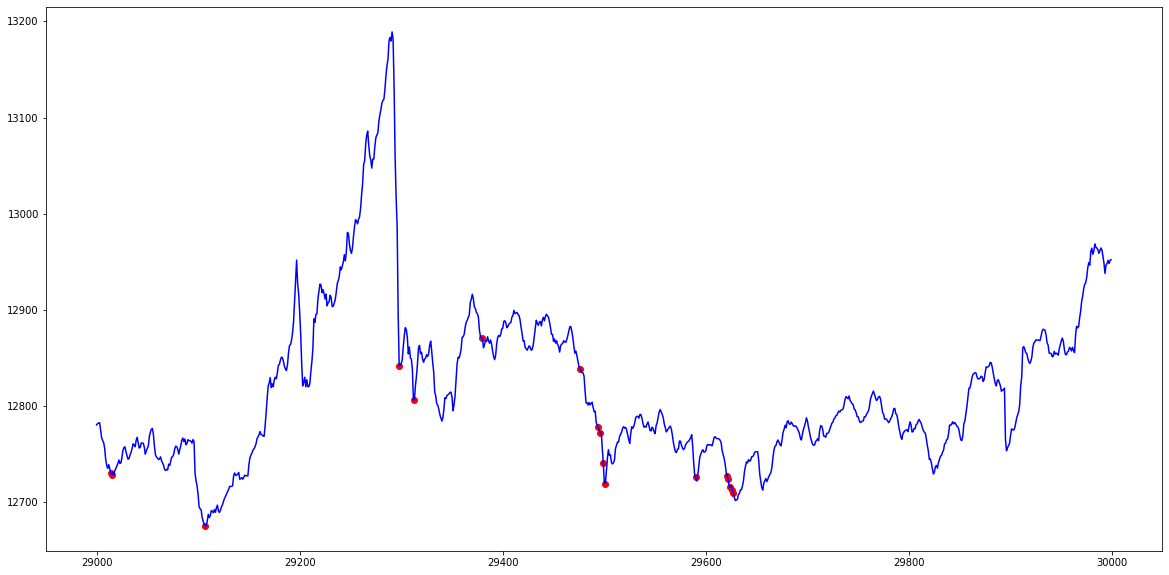

In [33]:
import matplotlib.pyplot as plt
plt.clf()

plt.figure(figsize=(20,10))
plt.scatter(x=first_amnt.index, y=first_amnt['buy'], color='red')

# plt.scatter(x=first_amnt.index, y=first_amnt['optimal_buy'], color='purple')

# plt.scatter(x=first_amnt.index, y=first_amnt['sell'], color='green')

plt.plot(first_amnt.index, first_amnt['close'], color='blue')
plt.show()

In [34]:
# plt.figure(figsize=(20,10))
# plt.plot(first_amnt.index, first_amnt['count'].rolling(480).mean(), color='purple')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(1440).mean(), color='blue')
# plt.plot(first_amnt.index, first_amnt['count'].rolling(4320).mean(), color='orange')
# plt.show()

In [35]:
from v2.research.scripts import notebook_utils as nu

In [36]:
test_coin, test_freq = 'COMP', 1

In [37]:
test_dataset, test_features, test_scaler = nu.loadData(indicators=['cci', 'psar'],
                            param_spec={},
                            test=True,
                            test_coin=test_coin,
                            test_freq=test_freq,
                            spans=[{'indicator_name':'momentum',
                                    'column_name': 'CCI',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'close',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'roc',
                                    'column_name': 'PSAR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]},
                                    {'indicator_name':'momentum',
                                    'column_name': 'PSAR',
                                    'param_name': 'period',
                                    'param_values': [1,5,10]}
                                    ],

                            scale='minmax')

Loading data from COMPUSDT-1m...
Loading data from chunk 0...


In [38]:
scalers

[[MinMaxScaler(copy=True, feature_range=(0, 1)), 'BTCUSDT-1m']]

In [40]:
model_dir, model_files, scaler_files = nu.saveModels([[clf_buy, 'clf_buy']], scalers + test_scaler, 'test_133')

In [41]:
model_files

['model_test_133_clf_buy.sav']

In [43]:
test_features

['CCI',
 'PSAR',
 'Momentum_CCI_period_1',
 'Momentum_CCI_period_5',
 'Momentum_CCI_period_10',
 'RateOfChange_close_period_1',
 'RateOfChange_close_period_5',
 'RateOfChange_close_period_10',
 'Momentum_close_period_1',
 'Momentum_close_period_5',
 'Momentum_close_period_10',
 'Momentum_close_period_1',
 'Momentum_close_period_5',
 'Momentum_close_period_10',
 'Momentum_PSAR_period_1',
 'Momentum_PSAR_period_5',
 'Momentum_PSAR_period_10']

In [42]:
result, num_entries, num_exits = nu.testModel(dataset=[[test_dataset], f'{test_coin}USDT-{test_freq}m-data_chunk000001.csv'], features=test_features, model_directory=model_dir, model_name=model_files[0], scaler_name=scaler_files[-1], strategy_type='buy')

Running benchmark...


TypeError: tuple indices must be integers or slices, not list

In [56]:
test_dataset.head(1).time.values[0]

1593089519999

In [2]:
result

NameError: name 'result' is not defined